<a href="https://colab.research.google.com/github/Fahbax/TM10007_group_13/blob/Develop/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment template

In [104]:
# Run this to use from colab environment
!git clone https://github.com/jveenland/tm10007_ml.git


fatal: destination path 'tm10007_ml' already exists and is not an empty directory.


## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [105]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/tm10007_ml/worclipo/Lipo_radiomicFeatures.csv', index_col=0)
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')
le = LabelEncoder()
data['label'] = le.fit_transform(data['label']) #1 = liposarcoma, 0 = lipoma

The number of samples: 115
The number of columns: 494


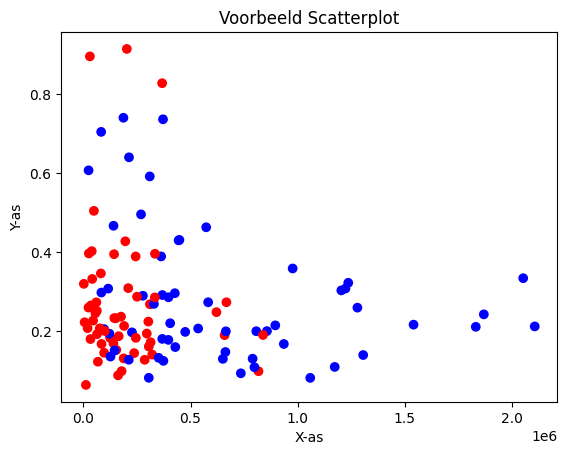

In [106]:
#print(data['label'])#,'PREDICT_original_sf_compactness_avg_2.5D','PREDICT_original_sf_compactness_std_2.5D'])
#df = pd.DataFrame(data, columns=["label", "PREDICT_original_sf_compactness_avg_2.5D","PREDICT_original_sf_compactness_std_2.5D"])
import matplotlib.pyplot as plt
colors = {0: 'red', 1: 'blue'}
#plt.scatter(data['PREDICT_original_sf_compactness_avg_2.5D'], data['PREDICT_original_sf_compactness_std_2.5D'], c=d['label'].map(colors))
plt.scatter(data['PREDICT_original_sf_volume_2.5D'], data['PREDICT_original_tf_Gabor_range_F0.05_A1.57'], c=data['label'].map(colors))

# Voeg labels toe aan de plot
plt.title('Voorbeeld Scatterplot')
plt.xlabel('X-as')
plt.ylabel('Y-as')

# Toon de plot
plt.show()

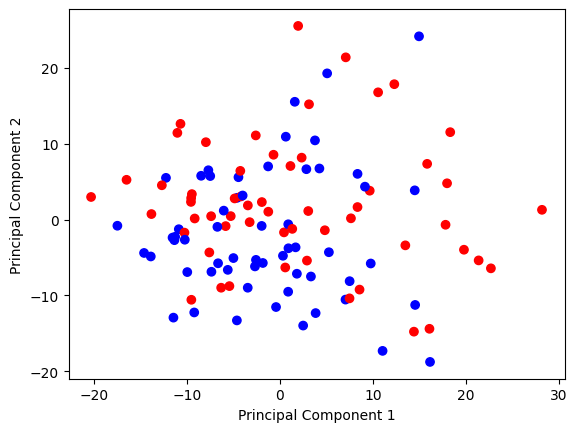

In [107]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# laad de gegevens
df = data.iloc[:, 2:]

# normaliseer de gegevens met behulp van StandardScaler
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df)

# haal alle kolommen uit het DataFrame
kolommen = df.columns.tolist()

# pas de PCA toe op de genormaliseerde gegevens
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_normalized)
principalDf = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2'])

# plot de resultaten
plt.scatter(principalDf['pc1'], principalDf['pc2'], c=data['label'].map(colors))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [108]:
from scipy.stats import shapiro
df=data.iloc[:,2:]
niet_normaal = 0
for column in df:
    for label in set(data['label']):
        a_values = data.loc[data['label'] == label, column]
        stat, p = shapiro(a_values)
        # interpreteer de uitvoer van de test
        alpha = 0.05
        if p > alpha:
            #print(f'De gegevens lijken normaal verdeeld (fail to reject H0):{column}{label}')
            continue
        else:
            #print(f'De gegevens lijken niet normaal verdeeld (reject H0):{column}{label}')
            niet_normaal+=1


print(niet_normaal)

cv_inner=KFold(n_splits=5,shuffle=True,random_state=1)

783


Names of colums of the features that have a non-zero coefficient [KNN]:
Index(['PREDICT_original_sf_volume_2.5D'], dtype='object')
Names of colums of the features that have a non-zero coefficient [KNN]:
Index(['PREDICT_original_sf_volume_2.5D'], dtype='object')
Names of colums of the features that have a non-zero coefficient [KNN]:
Index(['PREDICT_original_sf_volume_2.5D'], dtype='object')
Names of colums of the features that have a non-zero coefficient [KNN]:
Index(['PREDICT_original_sf_volume_2.5D', 'PREDICT_original_tf_Gabor_mean_F0.2_A0.0'], dtype='object')
Names of colums of the features that have a non-zero coefficient [KNN]:
Index(['PREDICT_original_sf_volume_2.5D',
       'PREDICT_original_tf_Gabor_mean_F0.2_A0.0',
       'PREDICT_original_tf_Gabor_peak_F0.2_A1.57'],
      dtype='object')


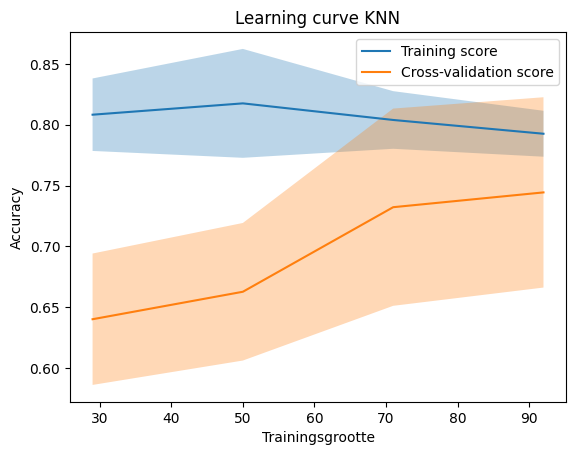

[Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.2))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=14, n_neighbors=13, p=1))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.2))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=17, n_neighbors=12, p=1))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.17))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=15, n_neighbors=8))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.18000000000000002))),
                ('classifier',
                 KNeighborsClassifier(leaf_si

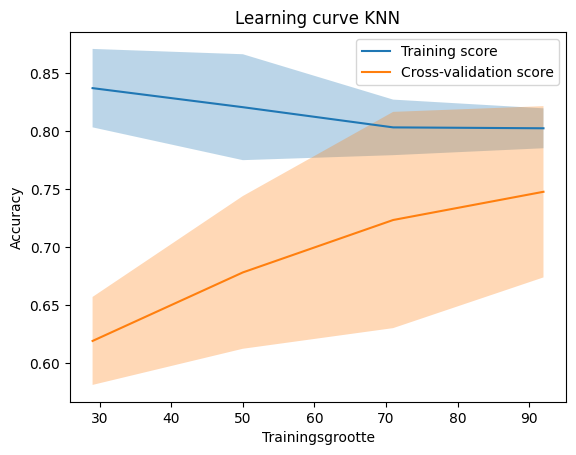

[Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.2))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=15, n_neighbors=14, p=1))]), Pipeline(steps=[('scaler', MinMaxScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.04))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=17, n_neighbors=3, p=1))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.2))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=15, n_neighbors=13))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.13))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=17, n_neighbor

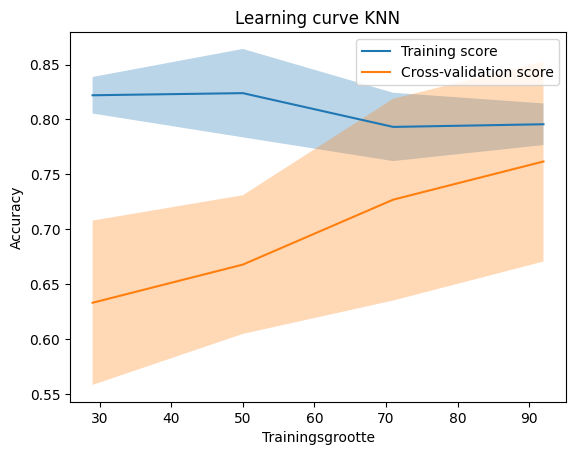

[Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.2))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=19, n_neighbors=14, p=1))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.2))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=6, n_neighbors=10, p=1))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.18000000000000002))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=20, n_neighbors=12))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.12))),
                ('classifier',
                 KNeighborsClassifier(leaf_si

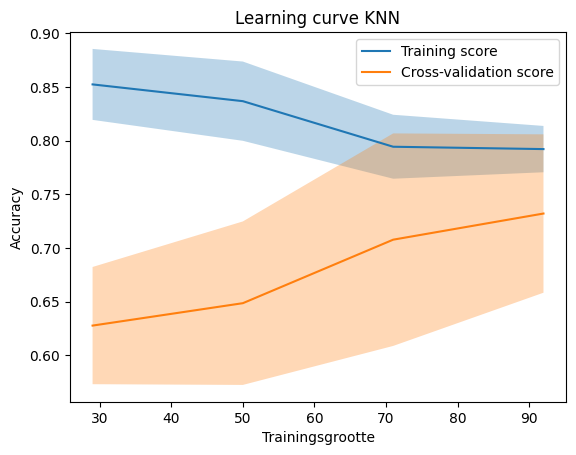

[Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.13))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=16, n_neighbors=9, p=1))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.01))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=20, n_neighbors=12))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.19))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=4, n_neighbors=13, p=1))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.19))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=1, n_neighb

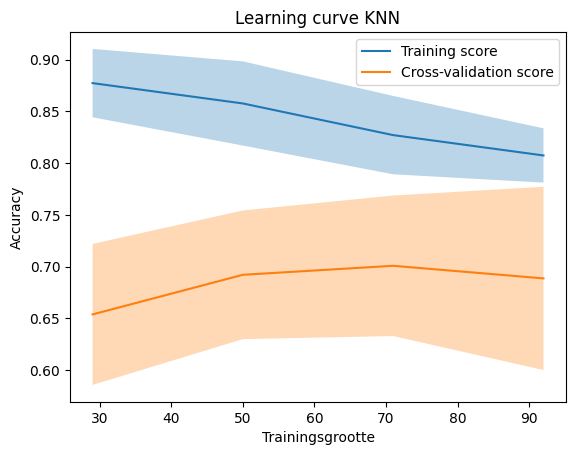

[Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.02))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=16, n_neighbors=12, p=1))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.05))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=9, n_neighbors=12, p=1))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.11))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=3, n_neighbors=12, p=1))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.12))),
                ('classifier',
                 KNeighborsClassifier(leaf_size=10, n_

In [109]:
#knn
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.feature_selection import SelectFromModel
from statistics import mean, stdev
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

for i in range(1,6,1):
    KNN_acc = []
    KNN_f1 = []
    KNN_train_mean = []
    KNN_train_std = []
    KNN_test_mean = []
    KNN_test_std = []
    KNN_best_models = []
    KNN_performance = []

    kf = KFold(n_splits=5) # Define the split - into 2 folds 
    kf.get_n_splits(data.index) # returns the number of splitting iterations in the cross-validator
    for train_index, test_index in kf.split(data):
        #print('TRAIN:', train_index, 'TEST:', test_index)
        data_train, data_test = data.iloc[train_index], data.iloc[test_index]
        X_train = data_train.drop('label', axis=1)
        label_train = data_train['label']
        X_test = data_test.drop('label', axis=1)
        label_test = data_test['label']
        
        # Split de data in train en test sets voor de toekomst
        #X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.15)

        #KNN
        Lasso_model = Lasso()
        Lasso_model.fit(X_train, label_train)
        pipe_knn = Pipeline([('scaler', StandardScaler()),('feature_selection', SelectFromModel(Lasso_model)),('classifier', KNeighborsClassifier())])
        parameters_knn = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                      'feature_selection__estimator__alpha': np.arange(0.01,0.21,0.01),
                      'classifier__n_neighbors': np.arange(1,16,1),
                      'classifier__p': [1, 2],
                      'classifier__leaf_size': np.arange(1,21,1)
                      }
        grid_knn = RandomizedSearchCV(pipe_knn, parameters_knn, n_iter=50, cv=cv_inner).fit(X_train, label_train) #GridSearchCV(pipe_knn, parameters_knn).fit(X_train, label_train) 
        best_pipe_knn = grid_knn.best_estimator_
        KNN_best_models.append(best_pipe_knn)
        KNN_performance.append(grid_knn.score(X_train, label_train))
        label_pred = best_pipe_knn.predict(X_test)
        # Getting access to Lasso-regressionmodel in the pipeline
        lasso_model = best_pipe_knn.named_steps['feature_selection'].estimator_  
        # Coëfficiënts of regressionmodel and determining non-zeros
        coefs = lasso_model.coef_
        nonzero_indices = np.nonzero(coefs)[0]
        # Printing column names on non-zero coefficient features after L1 regression
        nonzero_feature_names = X_train.columns[nonzero_indices]
        print("Names of colums of the features that have a non-zero coefficient [KNN]:")
        print(nonzero_feature_names)


        # Bereken de nauwkeurigheid van het model
        accuracy = accuracy_score(label_test, label_pred)
        KNN_acc.append(accuracy)
        f1 = f1_score(label_test,label_pred)
        KNN_f1.append(f1)
        KNN_train_sizes,train_scores,test_scores = learning_curve(best_pipe_knn,data.drop('label', axis=1),data['label'])
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)
        KNN_train_mean.append(train_mean)
        KNN_train_std.append(train_std)
        KNN_test_mean.append(test_mean)
        KNN_test_std.append(test_std)

    # Plotten van de learning curve KNN
    # print('Training set score: ' + str(grid_knn.score(X_train,label_train)))
    # print('Test set score: ' + str(grid_knn.score(X_test,label_test)))

    KNN_train_mean_mean = np.mean(KNN_train_mean, axis=0)
    KNN_train_mean_std = np.mean(KNN_train_std, axis=0)
    KNN_test_mean_mean = np.mean(KNN_test_mean, axis=0)
    KNN_test_mean_std = np.mean(KNN_test_std, axis=0)

    plt.figure()
    plt.plot(KNN_train_sizes, KNN_train_mean_mean,  label="Training score")
    plt.plot(KNN_train_sizes, KNN_test_mean_mean, label="Cross-validation score")
    plt.fill_between(KNN_train_sizes, KNN_train_mean_mean - KNN_train_mean_std, KNN_train_mean_mean + KNN_train_mean_std, alpha=0.3)
    plt.fill_between(KNN_train_sizes, KNN_test_mean_mean - KNN_test_mean_std, KNN_test_mean_mean + KNN_test_mean_std, alpha=0.3)
    plt.title('Learning curve KNN')
    plt.xlabel('Trainingsgrootte')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

    mean_KNN_acc = mean(KNN_acc)
    std_KNN_acc = stdev(KNN_acc)
    mean_KNN_f1 = mean(KNN_f1)
    std_KNN_f1 = stdev(KNN_f1)

    print(KNN_best_models)
    print(f'Accuracy KNN on trainingsdata {KNN_performance}')
    print(f'Accuracy KNN over de loops {KNN_acc}')
    print(f'Mean accuracy KNN {mean_KNN_acc} with SD {std_KNN_acc}')
    print(f'F1-score KNN over de loops {KNN_f1}')
    print(f'Mean F1 KNN {mean_KNN_f1} with SD {std_KNN_f1}')

Names of colums of the features that have a non-zero coefficient [RF]:
Index(['PREDICT_original_sf_compactness_std_2.5D',
       'PREDICT_original_sf_convexity_std_2.5D',
       'PREDICT_original_sf_volume_2.5D', 'PREDICT_original_of_theta_x',
       'PREDICT_original_of_theta_z',
       'PREDICT_original_tf_Gabor_skewness_F0.05_A0.0',
       'PREDICT_original_tf_Gabor_mean_F0.2_A0.0',
       'PREDICT_original_tf_Gabor_mean_F0.2_A0.79',
       'PREDICT_original_tf_Gabor_median_F0.2_A1.57',
       'PREDICT_original_tf_Gabor_skewness_F0.2_A1.57',
       'PREDICT_original_tf_Gabor_median_F0.5_A0.0',
       'PREDICT_original_phasef_phasesym_quartile_range_WL3_N5'],
      dtype='object')
Names of colums of the features that have a non-zero coefficient [RF]:
Index(['PREDICT_original_sf_volume_2.5D'], dtype='object')
Names of colums of the features that have a non-zero coefficient [RF]:
Index(['PREDICT_original_sf_volume_2.5D'], dtype='object')
Names of colums of the features that have a non-

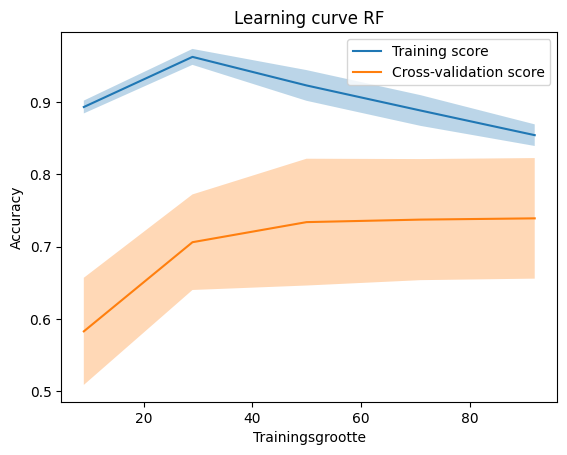

[Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.02, random_state=1))),
                ('classifier',
                 RandomForestClassifier(max_depth=4, min_samples_leaf=3,
                                        n_estimators=25, random_state=1))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.18, random_state=1))),
                ('classifier',
                 RandomForestClassifier(max_depth=2, min_samples_leaf=2,
                                        n_estimators=175, random_state=1))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.18, random_state=1))),
                ('classifier',
                 RandomForestClassifier(max_depth=4, min_samples_leaf=5,
                                        n_

In [119]:
#rf
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, stdev
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.feature_selection import SelectFromModel

RF_acc = []
RF_f1 = []
RF_train_mean = []
RF_train_std = []
RF_test_mean = []
RF_test_std = []
rf_best_models = []
rf_performance = []

kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(data.index) # returns the number of splitting iterations in the cross-validator
for train_index, test_index in kf.split(data):
    #print('TRAIN:', train_index, 'TEST:', test_index)
    data_train, data_test = data.iloc[train_index], data.iloc[test_index]
    X_train = data_train.drop('label', axis=1)
    label_train = data_train['label']
    X_test = data_test.drop('label', axis=1)
    label_test_rf = data_test['label']

    #Random forest
    Lasso_model = Lasso()
    Lasso_model.fit(X_train, label_train)
    pipe_rf = Pipeline([('scaler', StandardScaler()),('feature_selection', SelectFromModel(Lasso_model)),('classifier', RandomForestClassifier(random_state=1))])
    parameters_rf = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                  'feature_selection__estimator__alpha': np.arange(0.02,0.2,0.02),
                  'classifier__n_estimators': np.arange(25,200,25),
                  'classifier__max_depth': np.arange(1,10,1),
                  'classifier__min_samples_leaf': np.arange(1,6,1)
                  }
    grid_rf = RandomizedSearchCV(pipe_rf, parameters_rf, n_iter=50,cv=cv_inner).fit(X_train, label_train)
    best_pipe_rf = grid_rf.best_estimator_
    rf_best_models.append(best_pipe_rf)
    rf_performance.append(grid_rf.score(X_train, label_train))
    # Getting access to Lasso-regressionmodel in the pipeline
    lasso_model = best_pipe_rf.named_steps['feature_selection'].estimator_ 
    # Coëfficiënts of regressionmodel and determining non-zeros
    coefs = lasso_model.coef_
    nonzero_indices = np.nonzero(coefs)[0]
    # Printing column names on non-zero coefficient features after L1 regression
    nonzero_feature_names = X_train.columns[nonzero_indices]
    print("Names of colums of the features that have a non-zero coefficient [RF]:")
    print(nonzero_feature_names)
    #berekenen waardes over test set!!
    label_pred_rf = best_pipe_rf.predict(X_test)
    accuracy = accuracy_score(label_test, label_pred)
    RF_acc.append(accuracy)
    f1 = f1_score(label_test,label_pred)
    RF_f1.append(f1)
    RF_train_sizes,train_scores,test_scores = learning_curve(best_pipe_rf,data.drop('label', axis=1),data['label'])
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    RF_train_mean.append(train_mean)
    RF_train_std.append(train_std)
    RF_test_mean.append(test_mean)
    RF_test_std.append(test_std)

# Plotten van de learning curve RF
RF_train_mean_mean = np.mean(RF_train_mean, axis=0)
RF_train_mean_std = np.mean(RF_train_std, axis=0)
RF_test_mean_mean = np.mean(RF_test_mean, axis=0)
RF_test_mean_std = np.mean(RF_test_std, axis=0)

plt.figure()
plt.plot(RF_train_sizes, RF_train_mean_mean,  label="Training score")
plt.plot(RF_train_sizes, RF_test_mean_mean, label="Cross-validation score")
plt.fill_between(RF_train_sizes, RF_train_mean_mean - RF_train_mean_std, RF_train_mean_mean + RF_train_mean_std, alpha=0.3)
plt.fill_between(RF_train_sizes, RF_test_mean_mean - RF_test_mean_std, RF_test_mean_mean + RF_test_mean_std, alpha=0.3)
plt.title('Learning curve RF')
plt.xlabel('Trainingsgrootte')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

mean_RF_acc = mean(RF_acc)
std_RF_acc = stdev(RF_acc)
mean_RF_f1 = mean(RF_f1)
std_RF_f1 = stdev(RF_f1)

print(rf_best_models)
print(rf_performance)
print(f'Accuracy RF over de loops {RF_acc}')
print(f'Mean accuracy RF {mean_RF_acc} with SD {std_RF_acc}')
print(f'F1-score RF over de loops {RF_f1}')
print(f'Mean F1 RF {mean_RF_f1} with SD {std_RF_f1}')

Names of colums of the features that have a non-zero coefficient [SVM]:
Index(['PREDICT_original_sf_area_avg_2.5D',
       'PREDICT_original_sf_area_max_2.5D',
       'PREDICT_original_sf_area_min_2.5D',
       'PREDICT_original_sf_area_std_2.5D', 'PREDICT_original_sf_volume_2.5D',
       'PREDICT_original_hf_energy', 'PREDICT_original_logf_kurtosis_sigma1',
       'PREDICT_original_logf_energy_sigma1',
       'PREDICT_original_logf_energy_sigma5',
       'PREDICT_original_logf_energy_sigma10',
       'PREDICT_original_tf_LBP_energy_R3_P12',
       'PREDICT_original_tf_LBP_energy_R8_P24',
       'PREDICT_original_tf_LBP_energy_R15_P36',
       'PREDICT_original_tf_Gabor_energy_F0.05_A0.0',
       'PREDICT_original_tf_Gabor_energy_F0.05_A0.79',
       'PREDICT_original_tf_Gabor_energy_F0.05_A1.57',
       'PREDICT_original_tf_Gabor_energy_F0.05_A2.36',
       'PREDICT_original_tf_Gabor_energy_F0.2_A0.0',
       'PREDICT_original_tf_Gabor_energy_F0.2_A0.79',
       'PREDICT_original_tf_G

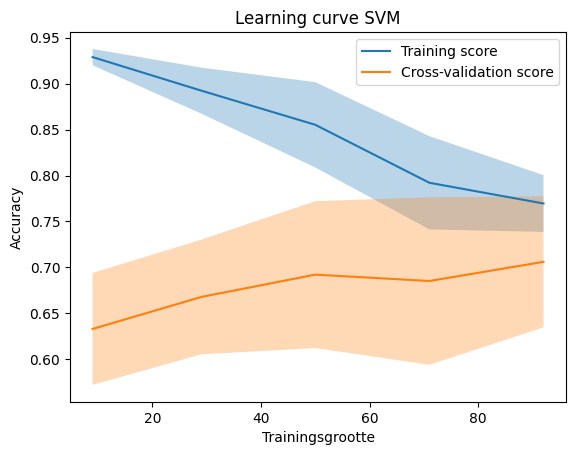

[Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.19))),
                ('classifier', SVC(C=100, gamma=0.0001, kernel='linear'))]), Pipeline(steps=[('scaler', MinMaxScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.01))),
                ('classifier', SVC(C=1000, gamma=0.0001))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.18000000000000002))),
                ('classifier', SVC(C=10, gamma=1, kernel='sigmoid'))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.18000000000000002))),
                ('classifier', SVC(C=1000, gamma=0.0001, kernel='sigmoid'))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
      

In [116]:
#svm

from sklearn.model_selection import KFold, train_test_split, learning_curve, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.feature_selection import SelectFromModel
from statistics import mean, stdev

SVM_acc = []
SVM_f1 = []
SVM_train_mean = []
SVM_train_std = []
SVM_test_mean = []
SVM_test_std = []
svm_best_models = []
svm_performance = []

kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(data.index) # returns the number of splitting iterations in the cross-validator
for train_index, test_index in kf.split(data):
    #print('TRAIN:', train_index, 'TEST:', test_index)
    data_train, data_test = data.iloc[train_index], data.iloc[test_index]
    X_train = data_train.drop('label', axis=1)
    label_train = data_train['label']
    X_test = data_test.drop('label', axis=1)
    label_test = data_test['label']

    #SVM
    Lasso_model = Lasso()
    Lasso_model.fit(X_train, label_train)
    pipe_svm = Pipeline([('scaler', StandardScaler()),('feature_selection', SelectFromModel(Lasso_model)),('classifier', svm.SVC())])
    parameters_svm = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                  'feature_selection__estimator__alpha': np.arange(0.01,0.21,0.01),
                  'classifier__C': [0.1, 1, 10, 100, 1000],
                  'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'classifier__kernel': ["linear" , "poly", "rbf", "sigmoid", "precomputed"]
                  }
    grid_svm = RandomizedSearchCV(pipe_svm, parameters_svm, n_iter=50, cv=cv_inner).fit(X_train, label_train)
    best_pipe_svm = grid_svm.best_estimator_
    svm_best_models.append(best_pipe_svm)
    label_pred = best_pipe_svm.predict(X_test)
    svm_performance.append(grid_svm.score(X_train,label_train))

    #Getting access to Lasso-regressionmodel in the pipeline
    lasso_model = best_pipe_svm.named_steps['feature_selection'].estimator_  
    # Coëfficiënts of regressionmodel and determining non-zeros
    coefs = Lasso_model.coef_
    nonzero_indices = np.nonzero(coefs)[0]
    # Printing column names on non-zero coefficient features after L1 regression
    nonzero_feature_names = X_train.columns[nonzero_indices]
    print("Names of colums of the features that have a non-zero coefficient [SVM]:")
    print(nonzero_feature_names)

    accuracy = accuracy_score(label_test, label_pred)
    SVM_acc.append(accuracy)
    f1 = f1_score(label_test,label_pred)
    SVM_f1.append(f1)
    SVM_train_sizes,train_scores,test_scores = learning_curve(best_pipe_svm,data.drop('label', axis=1),data['label'])
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    SVM_train_mean.append(train_mean)
    SVM_train_std.append(train_std)
    SVM_test_mean.append(test_mean)
    SVM_test_std.append(test_std)

# Plotten van de learning curve SVM
SVM_train_mean_mean = np.mean(SVM_train_mean, axis=0)
SVM_train_mean_std = np.mean(SVM_train_std, axis=0)
SVM_test_mean_mean = np.mean(SVM_test_mean, axis=0)
SVM_test_mean_std = np.mean(SVM_test_std, axis=0)

plt.figure()
plt.plot(SVM_train_sizes, SVM_train_mean_mean,  label="Training score")
plt.plot(SVM_train_sizes, SVM_test_mean_mean, label="Cross-validation score")
plt.fill_between(SVM_train_sizes, SVM_train_mean_mean - SVM_train_mean_std, SVM_train_mean_mean + SVM_train_mean_std, alpha=0.3)
plt.fill_between(SVM_train_sizes, SVM_test_mean_mean - SVM_test_mean_std, SVM_test_mean_mean + SVM_test_mean_std, alpha=0.3)
plt.title('Learning curve SVM')
plt.xlabel('Trainingsgrootte')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

mean_SVM_acc = mean(SVM_acc)
std_SVM_acc = stdev(SVM_acc)
mean_SVM_f1 = mean(SVM_f1)
std_SVM_f1 = stdev(SVM_f1)

print(svm_best_models)
print(f'Accuracy SVM over train set {svm_performance}')
print(f'Accuracy SVM over de loops {SVM_acc}')
print(f'Mean accuracy SVM {mean_SVM_acc} with SD {std_SVM_acc}')
print(f'F1-score SVM over de loops {SVM_f1}')
print(f'Mean F1 SVM {mean_SVM_f1} with SD {std_SVM_f1}')

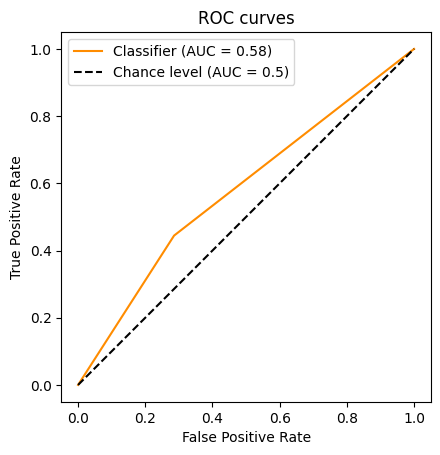

In [117]:
#ROC curve best classifier (RF)

from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(
    label_test_rf,label_pred_rf,
    color="darkorange")

plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves")
plt.legend()
plt.show()